<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/Problem_set/Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [676]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

**Generate data**




In [688]:
# We define the groundtruth mapping between x and y
def f_x(x):
  return 0.1 + 1.0 * x - 2.3 * x ** 2 + 3.1 * x ** 3 

def noisy_f_x(x):
    return f_x(x) + np.random.normal(0,eta,x.shape)

In [678]:
# we generate N datapoints for x picked randomly
N = 20
x_range = 1
A = x_range # these are just some numbers we picked to randomize x
x = np.linspace(-x_range,x_range,N) + A * np.random.random_sample(N)

**Split into train and validation set**

In [679]:
eta = 0.05
test_ratio = 0.4
y_noisy = noisy_f_x(x)
x,y = x, y_noisy 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = test_ratio)
# x_train,y_train = x[:train_samples],y[:train_samples]
# x_test, y_test = x[train_samples:],y[train_samples:]

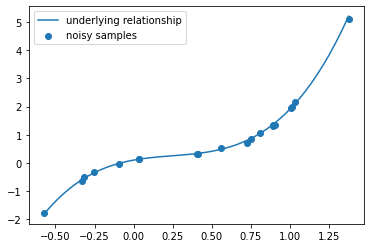

In [680]:
fig = plt.figure()
x_lin = np.linspace(np.min(x),np.max(x),50)
plt.plot(x_lin,f_x(x_lin),label='underlying relationship')
plt.scatter(x,y,label='noisy samples')
plt.legend()
plt.show()

**Define various order polynomials**

In [693]:
def get_polynomial_model(model_order:int,x_train,y_train):
  higher_order_featurizer = PolynomialFeatures(degree=(1,model_order))
  x_train_higher_order = higher_order_featurizer.fit_transform(x_train.reshape(-1,1))
  higher_order_model = LinearRegression().fit(x_train_higher_order,y_train)
  return higher_order_model,higher_order_featurizer

def get_prediction(model_order:int, x_train, y_train, x_test):
  model,featurizer = get_polynomial_model(model_order,x_train, y_train)
  y_pred = model.predict(featurizer.fit_transform(
      x_test.reshape(-1,1))
  )
  return y_pred

**Plot results**

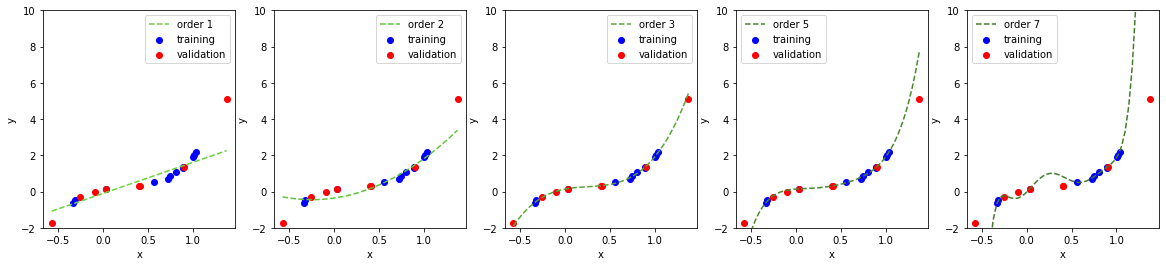

In [694]:
x_min = min(np.min(x_train),np.min(x_test))
x_max = max(np.max(x_train),np.max(x_test))

x_pred = np.linspace(x_min, x_max ,50)

model_orders = [1,2,3,5,7]
xy_pairs = [ (x_pred,get_prediction(od,x_train,y_train,x_pred)) for od in model_orders]

num_subplots = len(model_orders)
fig,ax = plt.subplots(1,num_subplots,figsize=(num_subplots*4,4))
labels = [f'order {mo}' for mo in model_orders]
label_colors = ['#67d33d','#60c33a','#54a634','#47882d','#427b2a']

for subplot,xy,l,c in zip(ax,xy_pairs, labels, label_colors) :
  subplot.scatter(x_train,y_train,c='blue',label='training')
  subplot.scatter(x_test,y_test,c='red',label='validation')

  x,y = xy
  subplot.plot(x,y,'--',color = c,label=l)
  subplot.set_xlabel('x')
  subplot.set_ylabel('y')
  subplot.set_ylim([-2,10])
  subplot.legend()
plt.show()

**Sample from the underlying distribution multiple times**

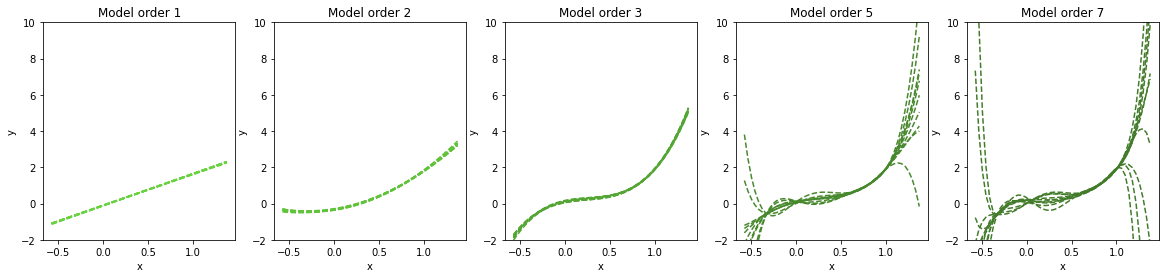

In [700]:
x_min = min(np.min(x_train),np.min(x_test))
x_max = max(np.max(x_train),np.max(x_test))

x_pred = np.linspace(x_min, x_max ,50)

model_orders = [1,2,3,5,7]

num_subplots = len(model_orders)
fig,ax = plt.subplots(1,num_subplots,figsize=(num_subplots*4,4))
labels = [f'order {mo}' for mo in model_orders]
label_colors = ['#67d33d','#60c33a','#54a634','#47882d','#427b2a']

for subplot,od,l,c in zip(ax,model_orders, labels, label_colors) :
  for i in range(10):
    
    xy_pairs = (x_pred,get_prediction(od,x_train,noisy_f_x(x_train),x_pred))

    x,y = xy_pairs
    subplot.plot(x,y,'--',color=c,label=l)
    subplot.set_xlabel('x')
    subplot.set_ylabel('y')
    subplot.set_ylim([-2,10])
  subplot.set_title(f'Model order {od}')
plt.show()